# Analyzing Uber pickups data from NYC using time series models
In this lab, you will start with Uber pickups data from NYC for January to June 2015. After some exploratory data analysis to understand the features of this data set, you will build a seasonal ARIMA model and a Prophet model to forecast demand for pickups.

In [124]:
import pandas as pd
import numpy as np
import datetime
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10

# Read the data

In [125]:
# place uber-pickup data in same folder as this notebook (remember to unzip the data first)

df15 = pd.read_csv('uber-raw-data-janjune-15.csv')

In [126]:
display(df15.shape)
df15.columns

(14270479, 4)

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

# Exploratory Data Analysis: Group pickups by date + hour (5 points)

- convert Pickup_date field into pandas datetime format (pd.to_datetime())
- order dataframe chronologically
- build two new columns: date and hour by extracting these from the converted Pickup_date field
- Group data by date and hour and 
- for each date,hour, calculate the number of pickups.
- plot the data (date, hour on x-axis, pickup counts on y)

Here is what your plot should look like
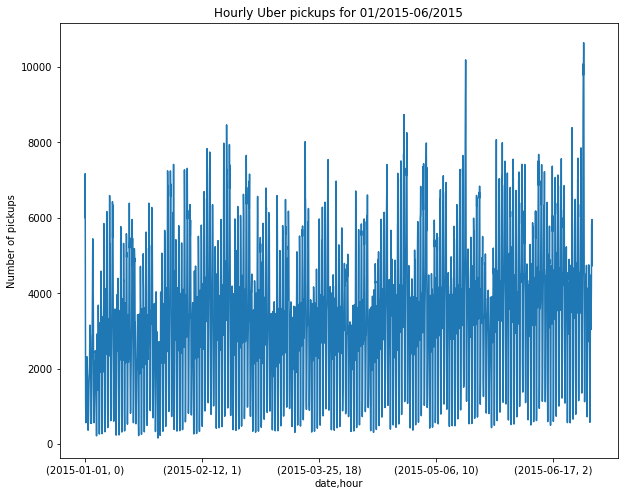

In [127]:
# your code here
#convert Pickup_date field into pandas datetime format (pd.to_datetime())
df15['Pickup_date'] = pd.to_datetime(df15['Pickup_date'])

In [128]:
#order dataframe chronologically
df15 = df15.sort_values(by = 'Pickup_date')

In [129]:
#build two new columns: date and hour by extracting these from the converted Pickup_date field
df15['hour'] = df15['Pickup_date'].dt.hour
df15['date'] = df15['Pickup_date'].dt.date

Text(0, 0.5, 'Number of pickups')

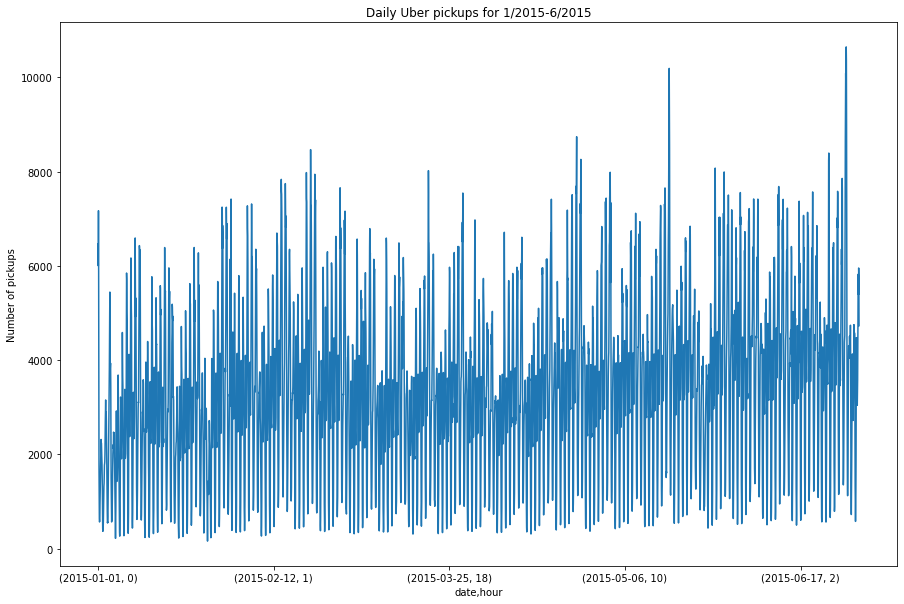

In [185]:
#for each date,hour, calculate the number of pickups.
df15.groupby(['date', 'hour'])['Dispatching_base_num'].count().plot()#dispatching base num(as y)
plt.title('Daily Uber pickups for 1/2015-6/2015')
plt.ylabel('Number of pickups')

# Group pickups by date (5 points)

Now group your data by date, and aggregate using count, the number of pickups on that date, and plot the results.
Your plot should look like this:
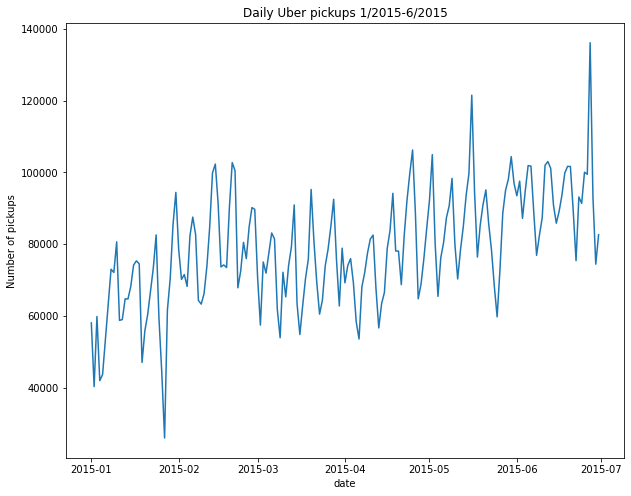

Text(0, 0.5, 'Number of pickups')

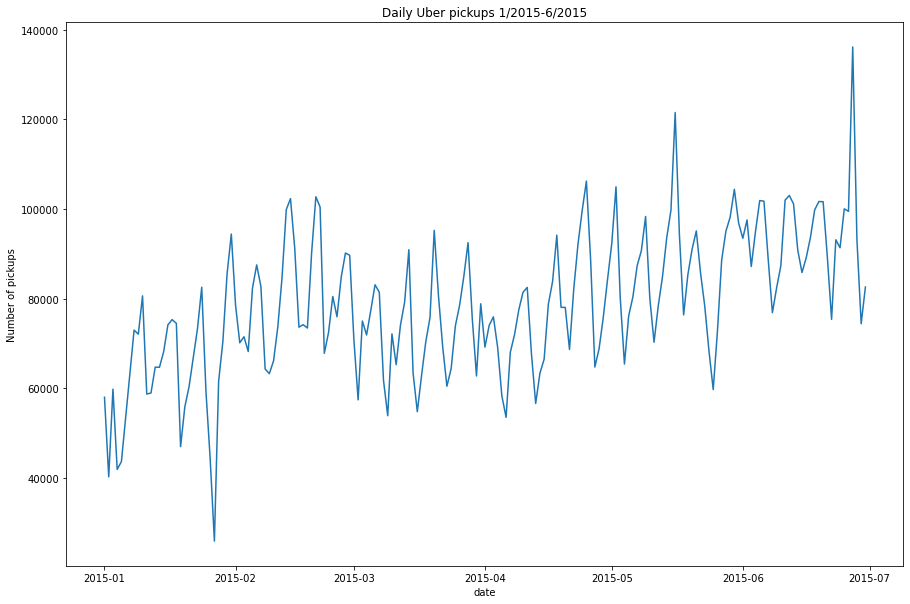

In [184]:
# your code here
#Now group your data by date, and aggregate using count, the number of pickups on that date, and plot the results
df15.groupby(['date'])['Dispatching_base_num'].count().plot()
plt.title('Daily Uber pickups 1/2015-6/2015')
plt.ylabel('Number of pickups')

# Variation in Uber pickup counts over hour of day and day of month (6 points)
- group data  by hour of day, and aggregate counts and plot them
- group data  by day of month, and aggregate counts and plot them
Hint: use the pandas datetime class to extract day of month, hour of day from the Pickup_date.
Your plots shuld look like this:
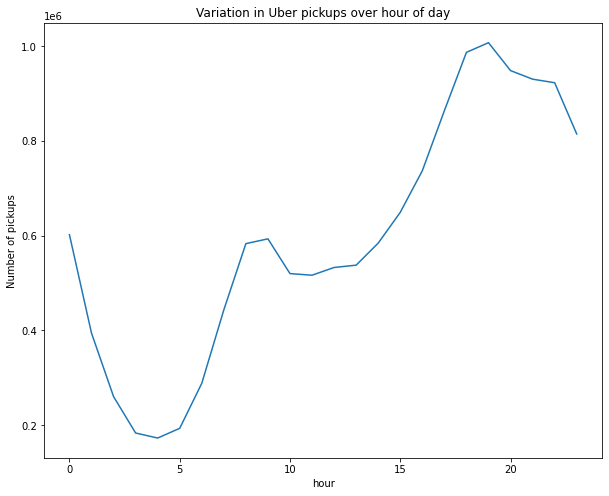
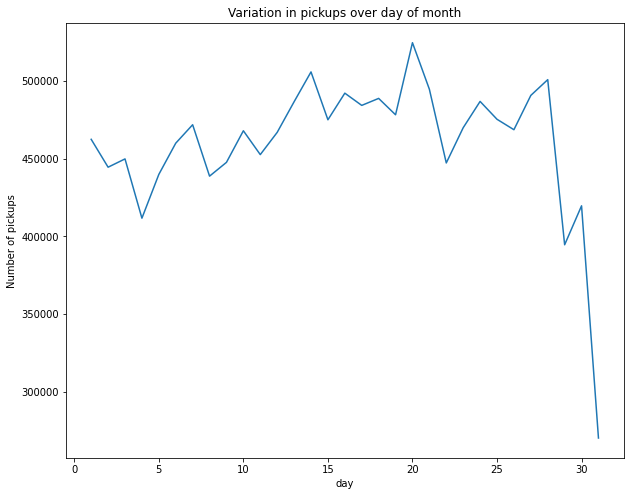

Text(0, 0.5, 'Number of pickups')

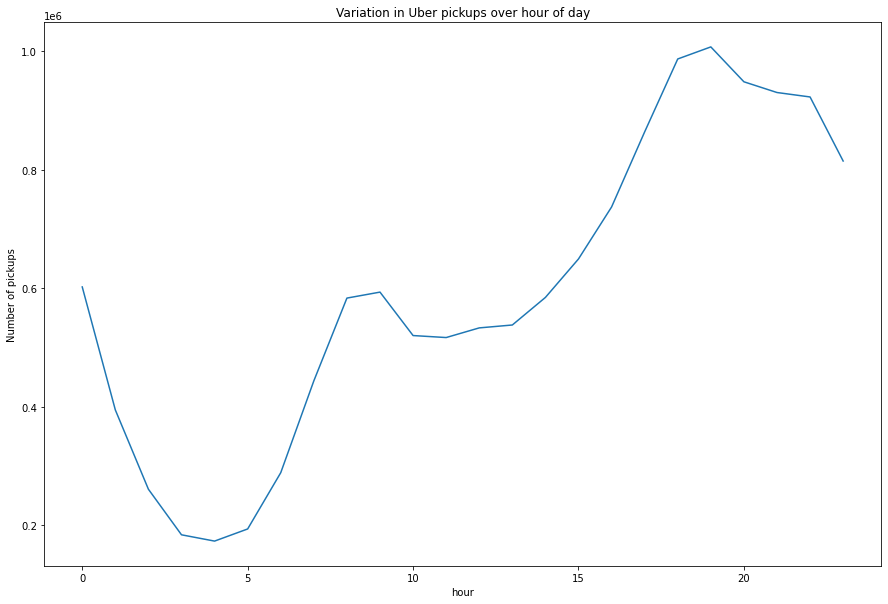

In [173]:
# your code here
#group data by hour of day, and aggregate counts and plot them
df15.groupby(['hour'])['Dispatching_base_num'].count().plot()
plt.title('Variation in Uber pickups over hour of day')
plt.ylabel('Number of pickups')

Text(0, 0.5, 'Number of pickups')

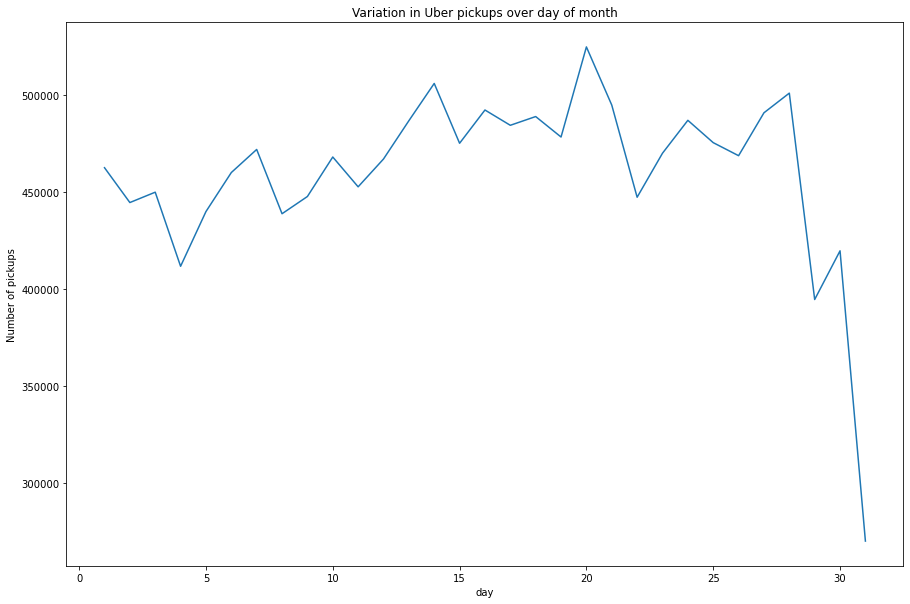

In [174]:
#group data by day of month, and aggregate counts and plot them Hint
df15.groupby(df15['Pickup_date'].dt.day)['Dispatching_base_num'].count().plot()

plt.title('Variation in Uber pickups over day of month')
plt.xlabel('day')
plt.ylabel('Number of pickups')

# Obervations about the plots (5 points)
- enter your observations about the plots in the Markdown box below.


The number of uber pickups has been growing steadily(mean) and there are spikes and drops in the number of pickups every month. There are a lot of uber pickups on the dates around 20th day of a month in the dataset(on average). Also, the most popular time to call an uber is 7-8 pm on average. The least popular time is around 4 am. Also, we can see cycles corresponding to each week/

# Split time series into train/test (5 points)
For 2015, there we have data for 6 months, Jan-June. We will split it up as follows:

- Training set: January to May (5 months)
- Test set: June (1 month)

In [134]:
# your code here to create two new dataframes df15_train and df15_test as specified above.
df15_train = df15[df15['Pickup_date'].dt.month < 6].copy()
df15_test = df15[df15['Pickup_date'].dt.month == 6].copy()

# Examining monthly trends: trends for April 2015 (5 points)
We will select the data from April 2015 in df15_train. Then we group it by date and hour, and count number of pickups for each (date,hour) and plot it.

Here is what your plot will look like:
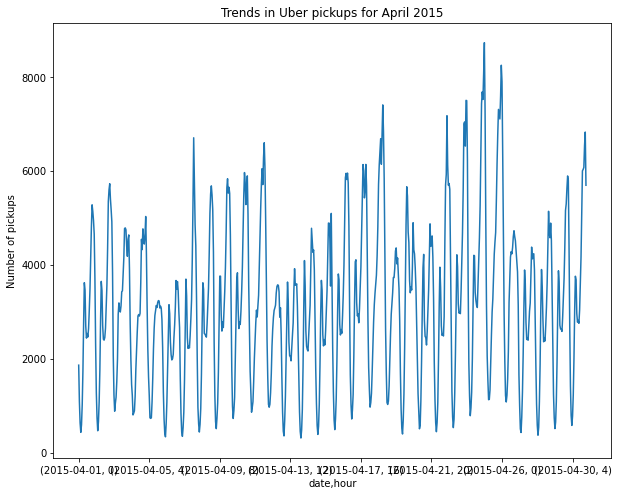

Text(0, 0.5, 'Number of pickups')

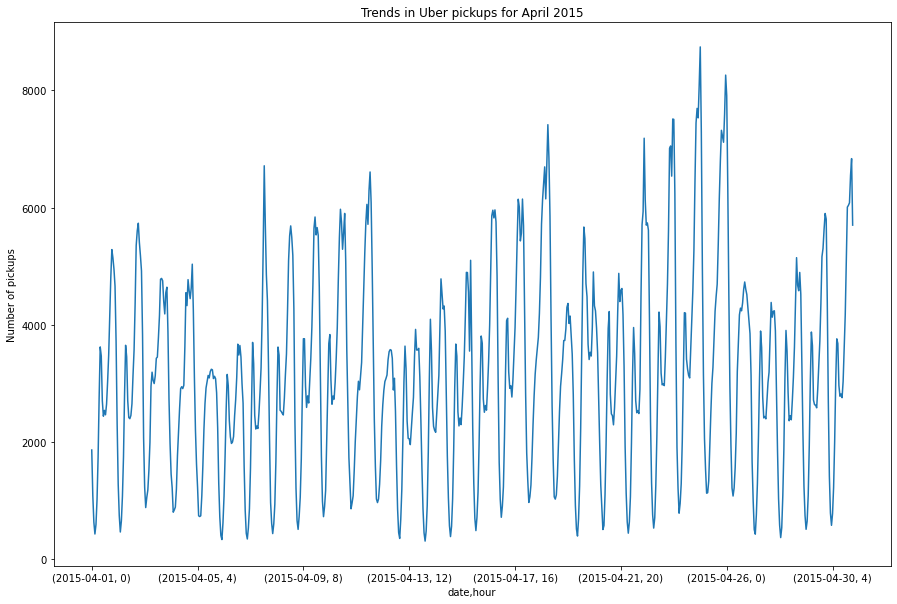

In [175]:
# your code to visualize pickups for April 2015
df15_train[df15_train['Pickup_date'].dt.month == 4].groupby(['date', 'hour'])['Dispatching_base_num'].count().plot()

plt.title('Trends in Uber pickups for April 2015')
plt.ylabel('Number of pickups')

## Observations on the monthly trend plot
- The trend(mean) is slightly positive. By the end of the month, there are slighlty more pickups on average than at the beginning of the month.

# Hourly trends (5 points)
We will look at hourly trends in the data for one specific day -- 2015-04-02.
Select data for that date, group by hour and count the number of pickups for each hour, then plot it. Here is what your plot will look like.

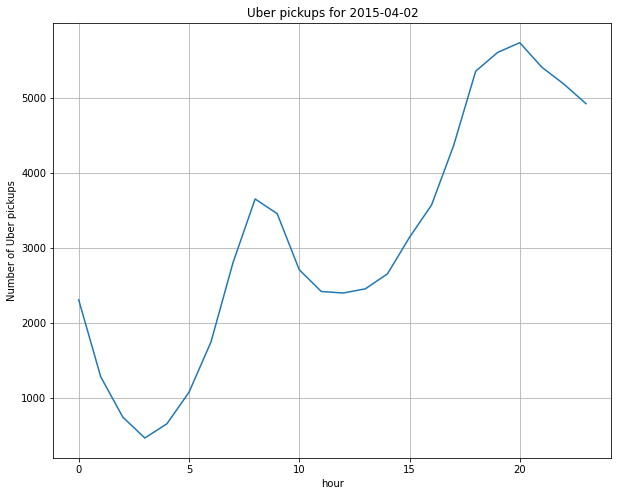

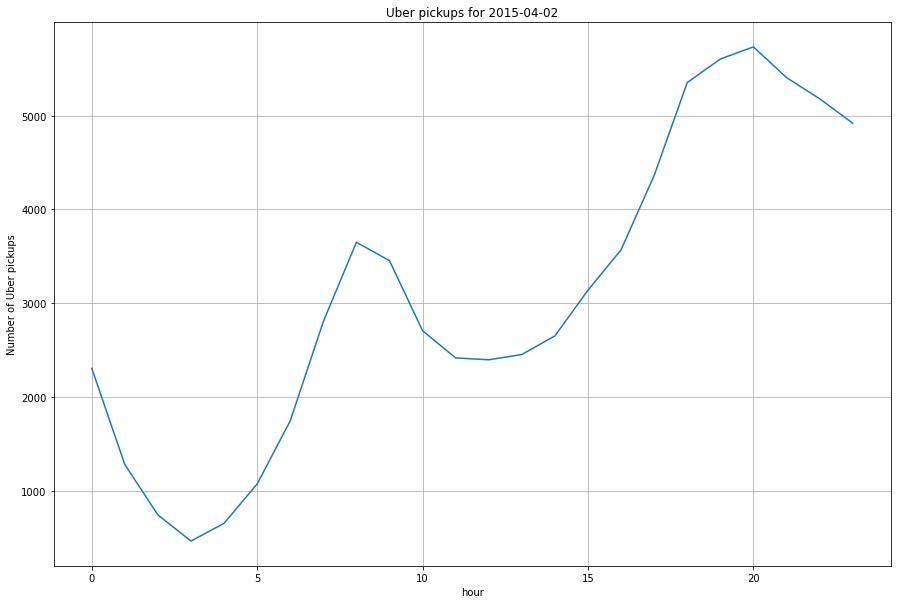

In [177]:
# your code for plotting hourly trends
df15_train[df15_train['Pickup_date'].dt.date == pd.to_datetime("2015-04-02")].groupby(['hour'])['Dispatching_base_num'].count().plot()
plt.title('Uber pickups for 2015-04-02')
plt.ylabel('Number of Uber pickups')
plt.grid(True)

# Observations on the hourly trend plot (5 points)
The hourly trend is generally positive. In other words, there are more pickups later in the day than at the beggining of the day. 

# Hourly trends for day of the week (5 points)
- add a new column to df15_train called 'weekday' by calling .date.weekday() on the 'date' field
- group the data by weekday and hour and count pickups for each (weekday, hour)
- plot 7 curves, one for each day, with hour on the x-axis and count of pickups at that hour on the y-axis

Here is what your plot will look like

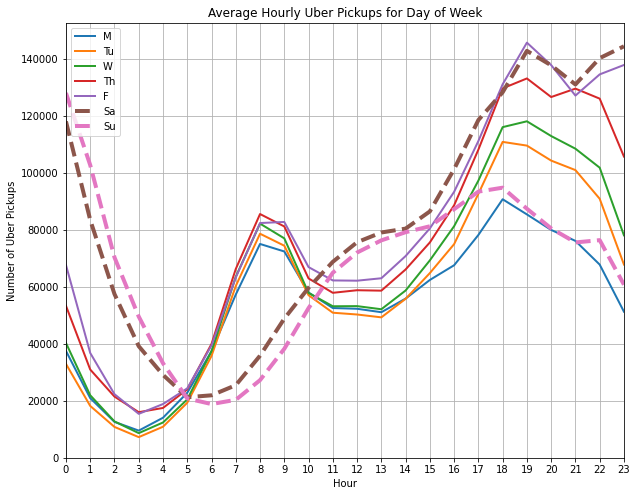

In [137]:
# your code for visualizing hourly trends as a function of the day of the week
#add a new column to df15_train called 'weekday' by calling .date.weekday() on the 'date' field
df15_train['weekday'] = df15_train['Pickup_date'].dt.weekday

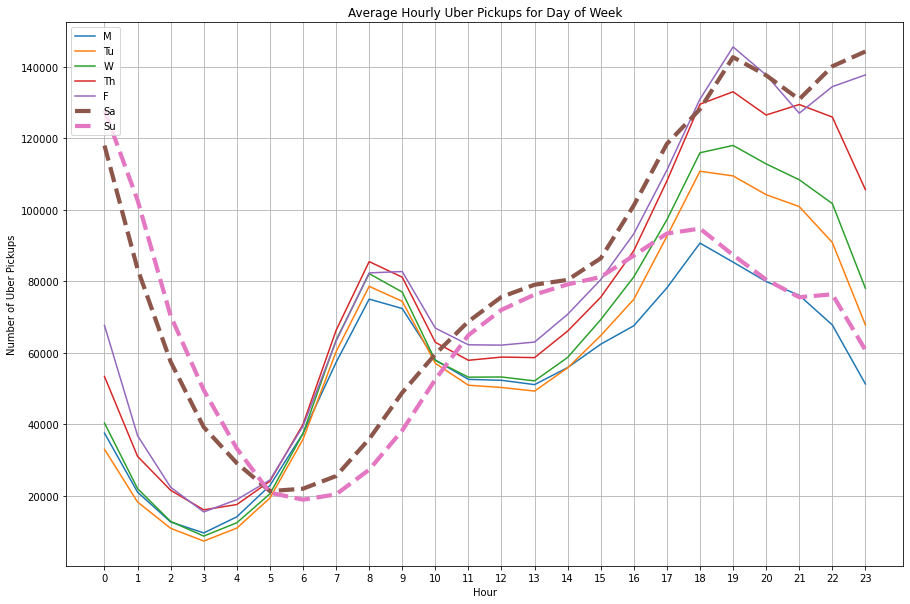

In [170]:
df15_train[df15_train['weekday']<5].groupby(['weekday', 'hour'])['Dispatching_base_num'].count().unstack(level = 0).plot()
plt.plot(df15_train[df15_train['weekday']>=5].groupby(['weekday', 'hour'])['Dispatching_base_num'].count().unstack(level = 0), '--', linewidth = 4.2)
plt.legend(['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su'], loc = 2)
plt.xticks(range(24))
plt.title('Average Hourly Uber Pickups for Day of Week');
plt.xlabel('Hour');
plt.ylabel('Number of Uber Pickups');
plt.grid(True)

# Observations on hourly trends by day of week (5 points)
- enter your observations from the plot above in the Markdown box below.

The pickups during the weekdays have a different distribution than during weekends. For example, the least popular time to call an Uber is 3 am during weekdays vs. 6 am during weekends. Also, the most popular time for weekends (evenings of Friday and Saturday) is on average later than on weekdays. Neverthelsee, there is an overall positive trend after 6 am.

# Stationarization (5 points)
Before we can use this data to forecast the future, we have to test its stationarity. We plot a rolling mean, standard deviation, and statistics from the Adjusted Dickey-Fuller Test.

In [139]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, rolling=24):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window = rolling).mean()
    rolstd = timeseries.rolling(window = rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='darkgray',label='Original')
    mean = plt.plot(rolmean, color='darkblue', label='Rolling Mean', lw=1)
    std = plt.plot(rolstd, color='red', label = 'Rolling Std', lw=1)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel('Differenced # of Uber Pickups\nx(t) - x(t-1)')
    plt.xlim(timeseries.index.min(), timeseries.index.max())
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries)
    print('> ADF Statistic: {:.3f}'.format(result[0]))
    print('> p-value: {:.3e}'.format(result[1]))
    print('> Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Stationarity test on training data (5 points)
- group the training data in df15_train by date and hour and count pickups in each group (call that ts_train)
- reset the index of ts_train
- call the test_stationarity function on ts_train with a rolling window of 168 (7 days)

You should get a plot like this:
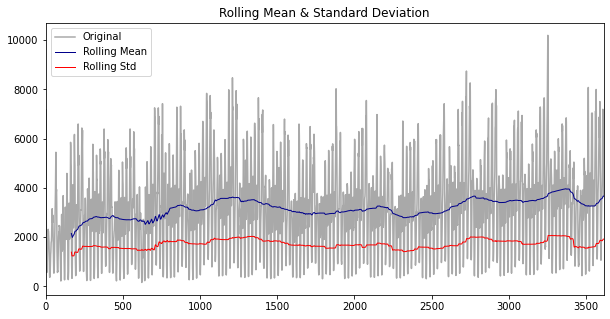

In [140]:
# your code for stationarity
#group the training data in df15_train by date and hour and count pickups in each group (call that ts_train)
ts_train = df15_train.groupby(['date', 'hour'])['Dispatching_base_num'].count()

In [141]:
ts_train = ts_train.reset_index()['Dispatching_base_num']

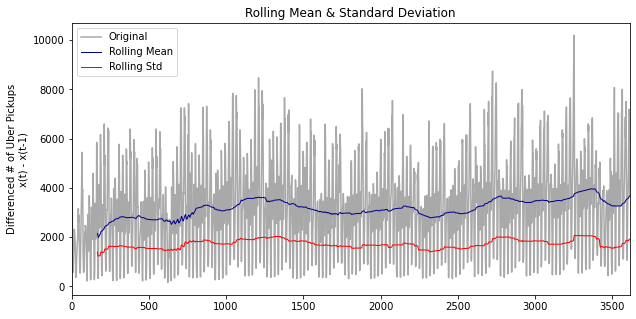

Results of Dickey-Fuller Test:
> ADF Statistic: -5.841
> p-value: 3.770e-07
> Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [179]:
test_stationarity(ts_train, 168)

# Stationarity test on differenced training data (5 points)
Even with the raw training data, you should see a significantly negative ADF statistic and near-zero p-value - this means our timeseries is already quite stationary.

However, we can still move forward with differencing to improve the already high stationarity. You should get a plot like this:

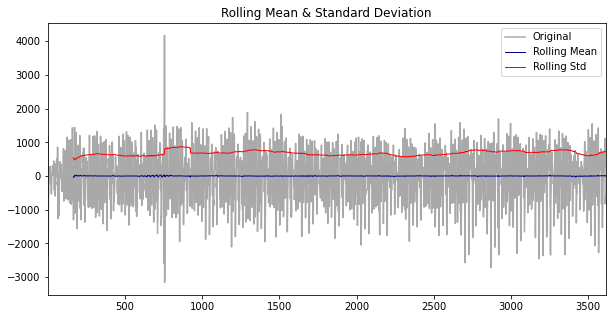

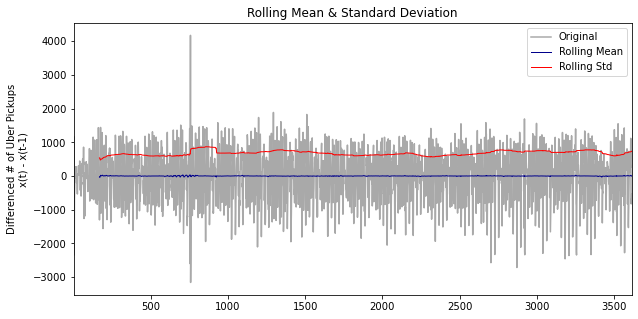

Results of Dickey-Fuller Test:
> ADF Statistic: -15.465
> p-value: 2.674e-28
> Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [143]:
# your code for testing stationarity of first difference of training data
detrended_ts_train = ts_train.diff(1).dropna()
test_stationarity(detrended_ts_train, 168)

# 1st order + seasonal differencing (5 points)
Since we know from previous plots that our data has a strong cyclical component to it of 1 week, we can try to difference the previous week's data to see if stationarity improves further.
Compute difference with time period of 168 (7 x 24 hours) of the first-order differenced data.

You should see a plot like this:
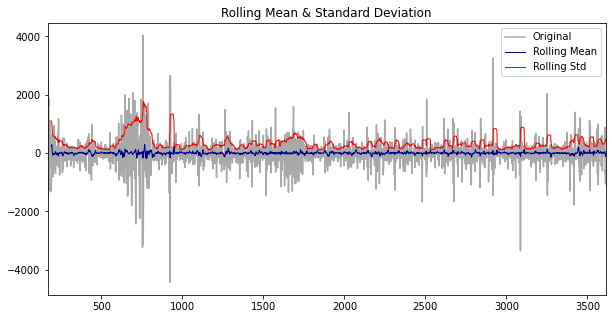

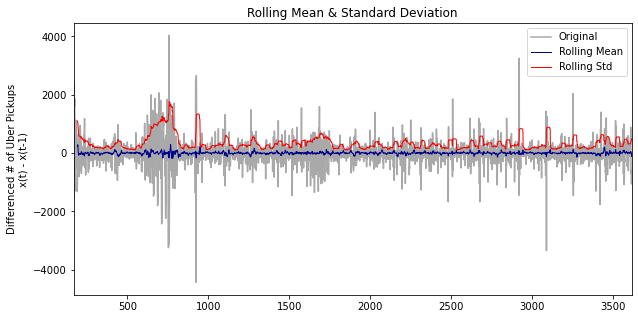

Results of Dickey-Fuller Test:
> ADF Statistic: -17.973
> p-value: 2.792e-30
> Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [144]:
# your code for computing seasonally differenced series and running test_stationarity on that series
seasonally_detrended_ts_train = detrended_ts_train.diff(168).dropna()
test_stationarity(seasonally_detrended_ts_train)

# Auto-Correlation Plots (5 points)
- draw the ACF and PACF plots for the seasonally differenced series


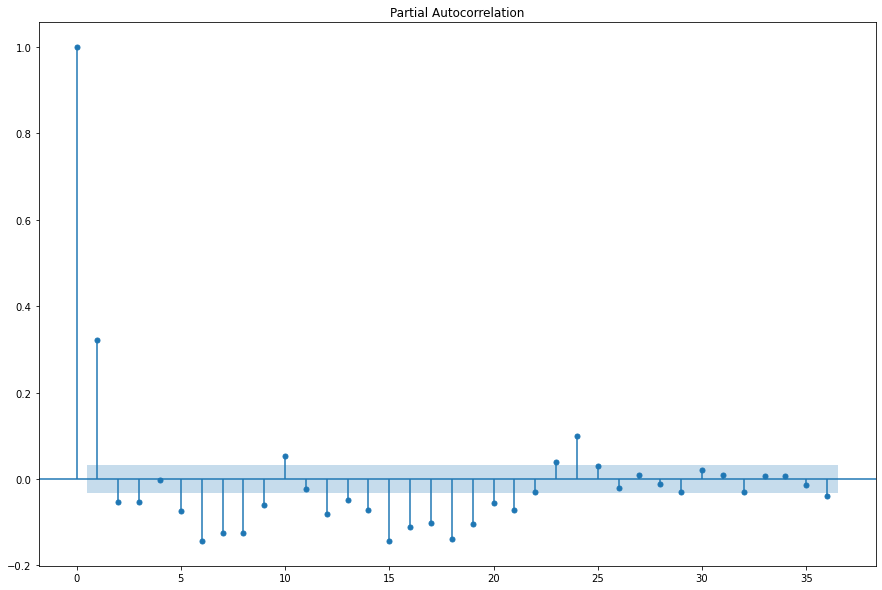

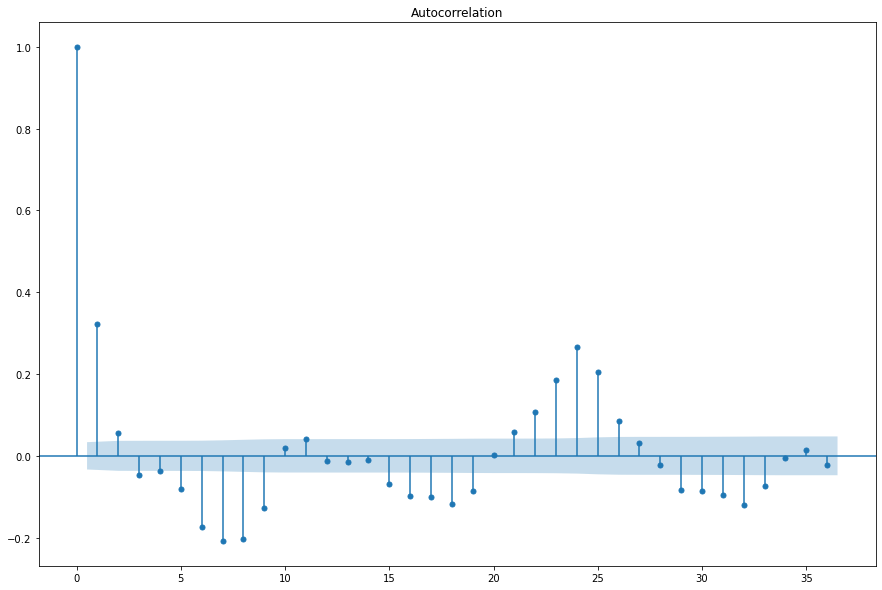

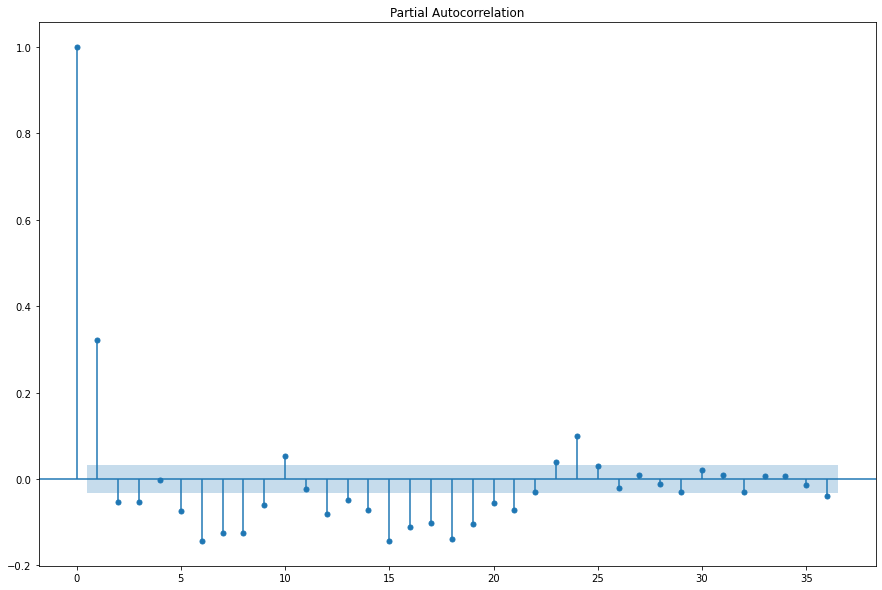

In [180]:
# your code for the acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seasonally_detrended_ts_train.dropna())
plot_pacf(seasonally_detrended_ts_train.dropna())

# Seasonal decomposition (5 points)
Typically, we would be able to use a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model as a baseline forecaster. However, because of its implementation in statsmodels, it does not perform well for series with very long seasonal lags (168 in this case - 1 week). Therfore, we'll use the seasonal_decompose method to gain additional insights into the timeseries.

- use the seasonal_decompose function from statsmodels.tsa.seasonal to decompose the training data series (dat/hour, number of pickups) with a period of 168.
- use the .plot() function to plot the components

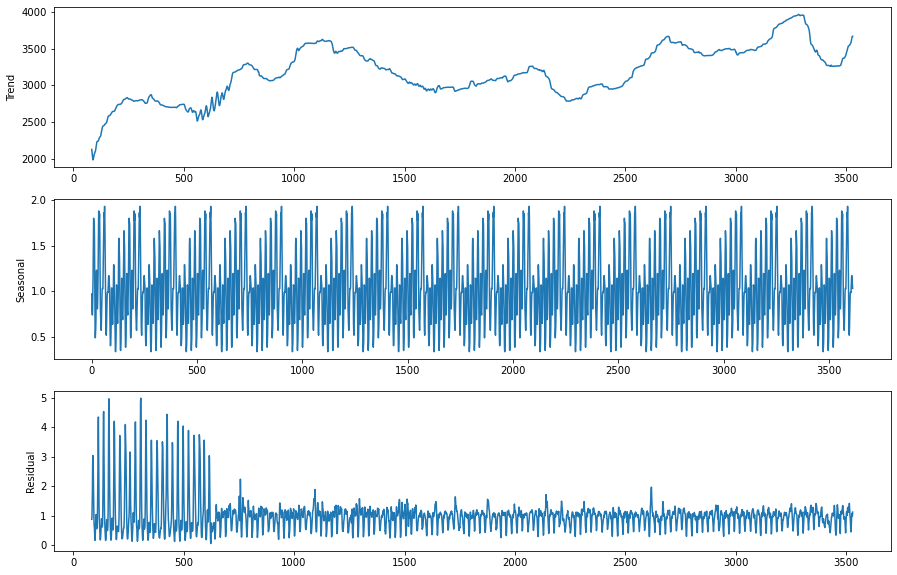

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
# your code for seasonal_decompose of the training time series
result = seasonal_decompose(ts_train, model='multiplicative',period=168)

fig, axs = plt.subplots(3)
axs[0].plot(ts_train.index, result.trend)
axs[0].set_ylabel('Trend')
axs[1].plot(ts_train.index,result.seasonal)
axs[1].set_ylabel('Seasonal')
axs[2].plot(ts_train.index,result.resid)
axs[2].set_ylabel('Residual');

# Create SARIMAX model on training data (5 points)
- ARIMA order: (2,1,1)
- seasonal order: (2,1,1,24)

Call sarimax.SARIMAX() with the training data time series and the orders specified above.

It is very compute intensive to tune the orders using auto_arima -- so I have supplied you good values for both of them.

In [147]:
from statsmodels.tsa.statespace import sarimax

# your code for creating the SARIMAX model
model = sarimax.SARIMAX(ts_train, order=(2,1,1), seasonal_order=(2,1,1,24), trend = 'n')
result = model.fit()

# Forecasting with the SARIMAX model (5 points)
- set predict_steps to be 24*30 (30 days of 24 hours each)
- make the forecast on the test data with the  model using the .forecast() with keyword argument steps = predict_steps
- calculate the root mean squared error between the forecast and the actual values in the test data
- plot the forecast and the true values in a plot as shown below.

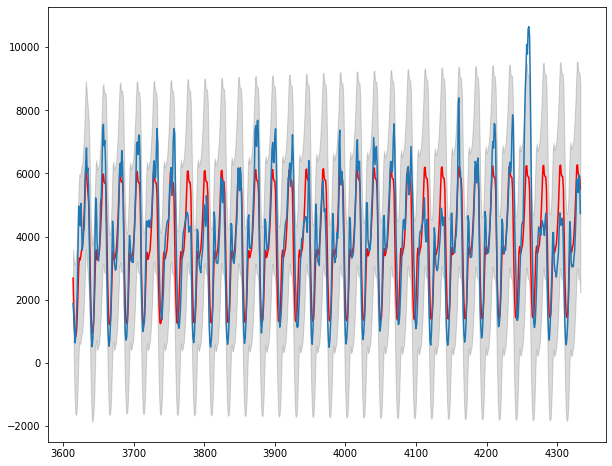

In [148]:
#Convert df15_test to the proper format
from sklearn.metrics import mean_squared_error
ts_test = df15_test.groupby(['date', 'hour'])['Dispatching_base_num'].count()
ts_test = ts_test.reset_index()['Dispatching_base_num']

Test MSE: 1054.218


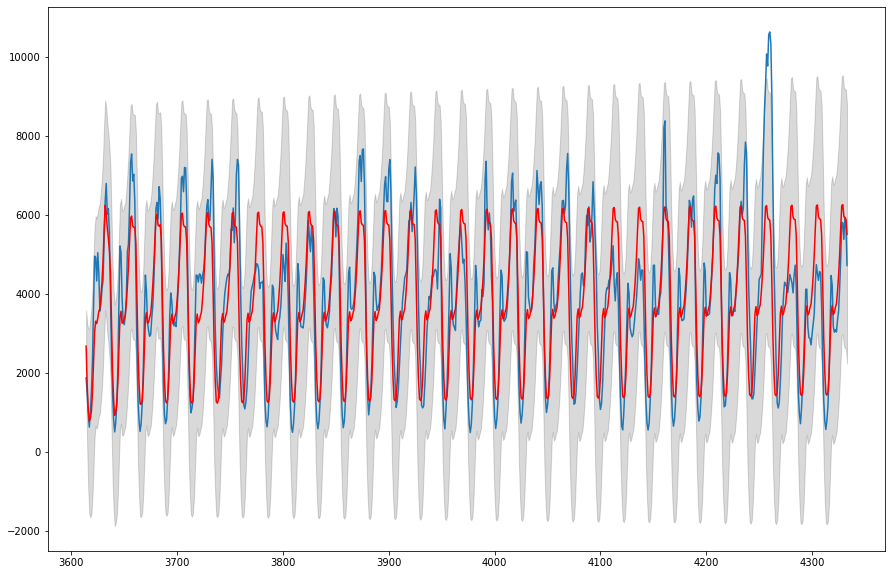

In [166]:
# # plot
pred = result.forecast(steps=24*30)
ts_test.index = pred.index
error = np.sqrt(mean_squared_error(ts_test, pred))
# pred_ci = result.conf_int(alpha=0.01)
plt.plot(ts_test)
plt.plot(pred, 'r')
#plt.fill_between(range(24*30),pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.15, label='99% Conf Int')
error = np.sqrt(mean_squared_error(ts_test, pred))
print('Test MSE: %.3f' % error)

pred_conf = result.get_forecast(steps=24*30)
pred_point = pred_conf.predicted_mean
pred_ci = pred_conf.conf_int(alpha=0.01)

plt.fill_between(ts_test.index,pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.15, label='99% Conf Int')

# Facebook Prophet
For the next model, we will use Facebook's open source forecasting package named Prophet. Its method calls are similar to sklearn, when it comes to fitting and predicting. It's a quick way to generate forecasts without too many extraneous features.

# Creating time series in Prophet format (5 points)
- make sure you turn the training data into a date field with date+hour (use pd.DateOffset to add the hours) and call that column 'ds'. Rename the pickup counts field as 'y'

In [150]:
# your code to turn the training time series into Prophet format
df15_train_prop = df15_train.copy()


In [151]:
from pandas.tseries.offsets import DateOffset
df15_train_prop['ds'] = df15_train_prop[['date', 'hour']].apply(lambda x: x['date'] + DateOffset(hours = x['hour']), axis = 1)

In [152]:
train_prop = df15_train_prop.groupby(['ds'])['Dispatching_base_num'].count().reset_index()

In [153]:
train_prop = train_prop.rename(columns = {"Dispatching_base_num":"y"})

# Fitting time series to Prophet (5 points)
- set up a Prophet model with seasonality = False
- fit that model on the training series

In [154]:
# your code to fit the series
from prophet import Prophet
m = Prophet(yearly_seasonality=False)
m.fit(train_prop);

# Forecasting (5 points)
- make a future frame using .make_future_dataframe(periods=720, freq='H')
- construct the forecast using the model
- plot the forecast using the .plot() function associated with the model, with forecast as a argument.

Your plot should look like:
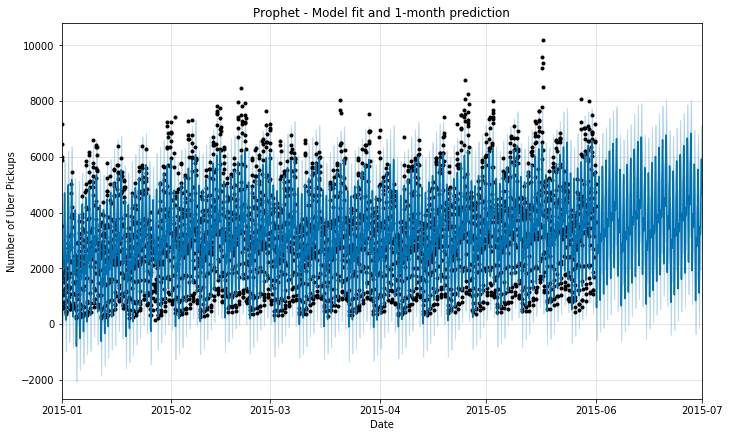

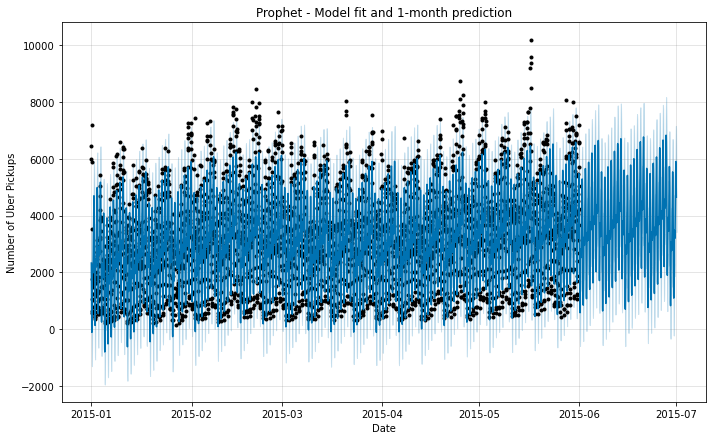

In [155]:
# your code here for forecasting
future = m.make_future_dataframe(periods=720, freq='H')
forecast = m.predict(future)
m.plot(forecast, xlabel='Date', ylabel='Number of Uber Pickups')
plt.title('Prophet - Model fit and 1-month prediction');

# Plot forecast components (5 points)
- use m.plot_components(forecast) to see the decomposition of the forecast into weekly and hourly trends

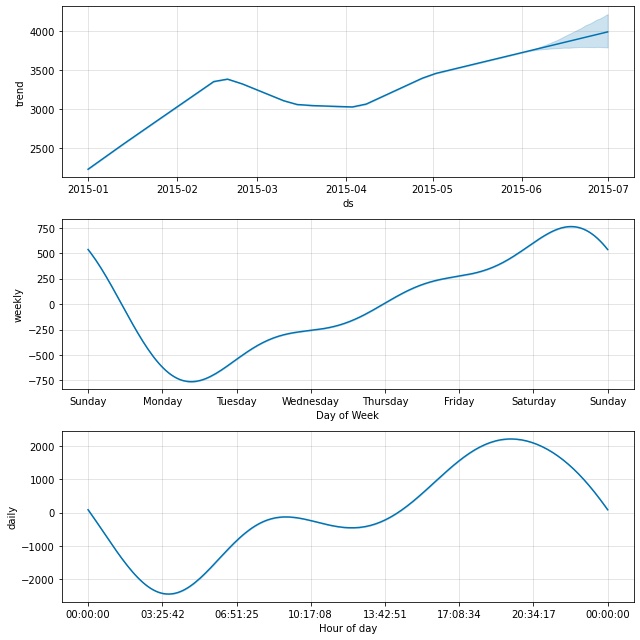

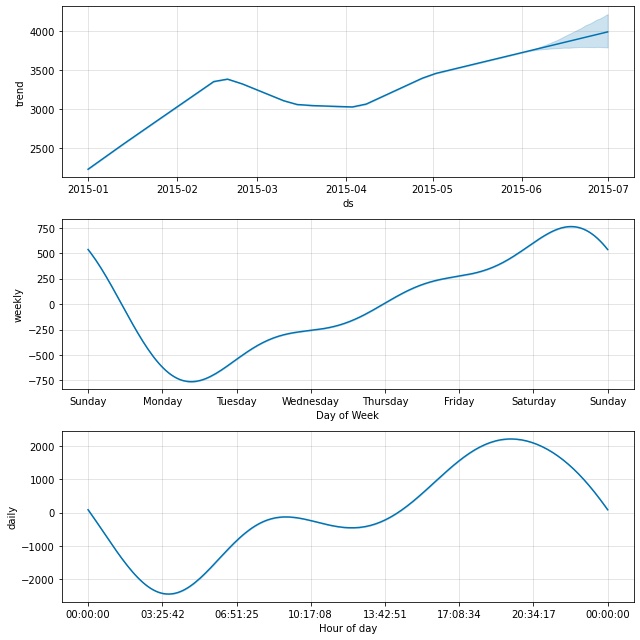

In [156]:
# your code here for plotting forecast components
m.plot_components(forecast)

# Evaluating the forecast (5 points)
- compare forecast to test series (use RMSE)
- plot the two series and comment on them (on the same plot)



In [157]:
# your code for evaluating forecasts
print("RMSE:", np.sqrt(mean_squared_error(ts_test, forecast[forecast['ds'].dt.month>5]['yhat'])))#is that a good rmse?


RMSE: 1003.5002752503405


In [158]:
# mean squared error on training data
plot_result = forecast[forecast['ds'].dt.month>5]['yhat'].copy()
# train_forecast = forecast.loc[forecast['ds'].dt.month>5]
# plt.plot(ts_test,'b',label='actual')
# plt.plot(train_forecast.ds,train_forecast.yhat,'r',label='predicted')
# plt.fill_between(train_forecast.ds,train_forecast.yhat_lower, train_forecast.yhat_upper, color='k', alpha=.15, label='99% Conf Int')
# plt.legend()
# plt.title('Fit on training data');
# train_rmse = rmse(df1_train.y, train_forecast.yhat, print_val=True)

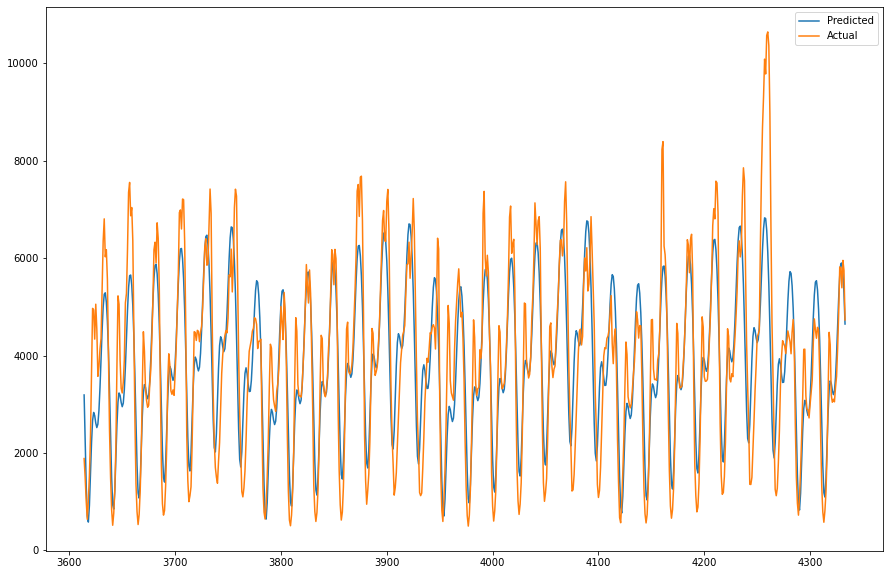

In [159]:
plot_result.index = ts_test.index
plot_result.plot()
ts_test.plot()
plt.legend(["Predicted", "Actual"])

# Compare the effectiveness of SARIMA models vs Prophet models (5 points)
- which model would you recommend we use for the prediction of demand for Uber pickups? Why?

The mean squared error for the prophet model is smaller, so the model does better job at predicting the time series. Also, it runs much faster. Therefore, I would reccomnd using the prophet model.